#**Chi-Square Test of Independence**

# The Chi-Square Test for Independence
The chi-square test for independence is a statistical method employed to investigate the presence of a relationship between two categorical variables. This test assesses whether the observed distribution of data significantly deviates from what would be expected if the variables were independent. By comparing the observed and expected frequencies in a contingency table, the chi-square test helps researchers determine if there is a statistically significant association between the two categorical variables. The null hypothesis assumes independence, while a rejection of the null suggests that a relationship exists. This test is widely utilized in various fields, such as medicine, sociology, and market research, providing a valuable tool for understanding the interdependence of categorical variables and guiding further analyses or targeted interventions.

## **Importing the Necessary Libraries and Data**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Apply Chi-Square Test
The following Python code utilizes the pandas and scipy.stats libraries to perform a chi-square test for independence, examining the relationship between two categorical variables. The initial step involves creating a **contingency table** using the pd.crosstab function, which showcases the frequency distribution of the variables 'lnpos_YN' and 'status'. The contingency table is then displayed, providing an overview of the observed frequencies. Following this, **row percentages** are calculated to offer insights into the relative proportions of each category within the rows. The chi-square test is conducted using chi2_contingency, providing the **chi-squared value, p-value,** and **degrees of freedom**. These statistical outputs help assess whether there is a significant association between the two categorical variables, aiding in the exploration and interpretation of their relationship.

In [20]:
df = pd.read_csv("/content/BCSprep.csv")

import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['lnpos_YN'], df['status'])

print("Contingency Table with Frequencies:")
print(contingency_table)
print("#"*60)

# Calculate row percentages
row_percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

print("\nRow Percentages:")
print(row_percentages)
print("#"*60)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Contingency Table with Frequencies:
status      0   1
lnpos_YN         
No        887  42
Yes       248  30
############################################################

Row Percentages:
status            0          1
lnpos_YN                      
No        95.479010   4.520990
Yes       89.208633  10.791367
############################################################

Chi-squared value: 13.900758213995182
P-value: 0.00019272070767964805
Degrees of freedom: 1


In [18]:
# Print data head
df.head()

,id,age,pathsize,lnpos,histgrad,er,pr,status,time,lnpos_YN,pathsize_Cat
0,1,60,NaN,0,3.0,0.0,0.0,0,9.466667,No,NaN
1,2,79,NaN,0,NaN,NaN,NaN,0,8.600000,No,NaN
2,3,82,NaN,0,2.0,NaN,NaN,0,19.333333,No,NaN
3,4,66,NaN,0,2.0,1.0,1.0,0,16.333333,No,NaN
4,5,52,NaN,0,3.0,NaN,NaN,0,8.500000,No,NaN


# Evaluate the Reliability of Chi-Square Independence Test
In the context of the chi-square independence test, assessing the "Percentage of cells with expected counts less than 5" serves as a critical gauge for the test's reliability. The chi-square test relies on the assumption that expected counts in each cell of the contingency table are sufficiently large. Specifically, when no more than 20% of the expected counts fall below 5, and all individual expected counts are 1 or greater, it is deemed safe to use the chi-square test with critical values from the chi-square distribution. This criterion acts as a safeguard, ensuring that the test's approximation remains accurate and trustworthy. However, vigilance is advised when a substantial proportion of cells falls below these thresholds, prompting researchers to consider alternative statistical methods, such as Fisher's Exact Test, to uphold the integrity of the analysis.

In [21]:
# Calculate the percentage of cells with expected counts less than 5
percentage_low_expected = (expected < 5).sum().sum() / (expected.shape[0] * expected.shape[1]) * 100

print(f"Percentage of cells with expected counts less than 5: {percentage_low_expected:.2f}%")


Percentage of cells with expected counts less than 5: 0.00%


# Check Residuals
In the analysis of contingency tables, residuals play a crucial role in investigating the direction and magnitude of relationships between two categorical variables. Residuals in this context refer to the differences between the observed and expected frequencies in each cell of the contingency table. These differences provide insights into whether the observed counts are higher or lower than what would be expected under the assumption of independence. Positive residuals suggest an overrepresentation of observations in a particular cell, indicating a potential positive association, while negative residuals signify an underrepresentation. By examining the pattern of residuals across the table, researchers can discern which cells contribute most to the observed association, helping to unveil the direction and strength of the relationship between the variables. This nuanced exploration enhances the interpretability of the chi-square test results and guides a more detailed understanding of the underlying categorical data dynamics.

In [22]:
# Calculate residuals (observed minus expected values)
residuals = contingency_table - expected

print("\nResiduals (Observed - Expected):")
print(residuals)


Residuals (Observed - Expected):
status            0          1
lnpos_YN                      
No        13.416736 -13.416736
Yes      -13.416736  13.416736


# Calculate the Odds Ratio
The odds ratio is a valuable measure in the context of dependence tests, providing a quantitative assessment of the strength and direction of the relationship between two categorical variables. Specifically, in the chi-square independence test, the odds ratio helps to explain how the odds of an event occurring in one category compare to the odds in another category. An odds ratio greater than 1 indicates an association between the variables, with higher values signifying a stronger relationship. Conversely, an odds ratio less than 1 suggests a negative association. The odds ratio adds a layer of granularity to dependence analyses, allowing researchers to not only discern the presence of an association but also gauge its magnitude. This measure is particularly valuable in fields like epidemiology and social sciences, where understanding the strength of relationships between categorical variables is crucial for drawing meaningful conclusions from observational data.

In [23]:
# Calculate odds ratio
odds_ratio = (contingency_table.iloc[0, 0] / contingency_table.iloc[0, 1]) / (contingency_table.iloc[1, 0] / contingency_table.iloc[1, 1])

print(contingency_table)
print(f"Odds ratio: {odds_ratio:.2f}")

status      0   1
lnpos_YN         
No        887  42
Yes       248  30
Odds ratio: 2.55


# The Odds Ratio Confidence Interval
The odds ratio confidence interval provides a range of plausible values for the true odds ratio, allowing for a more nuanced interpretation of the association between variables. When the 95% confidence interval includes the null value of 1, it implies that the odds of the outcome are not significantly different between the exposed and unexposed groups. In contrast, if the interval does not encompass 1, it suggests a statistically significant association. This comparison to the null value serves as a basis for hypothesis testing, with values crossing the null point indicating the absence of a meaningful effect, while values outside this range signify a potential impact, informing researchers about the significance and direction of the observed relationship.

In [24]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def OR_CIs(contingency_table):

    # Calculate odds ratio
    odds_ratio = (contingency_table.iloc[0, 0] / contingency_table.iloc[0, 1]) / (contingency_table.iloc[1, 0] / contingency_table.iloc[1, 1])

    # Calculate standard error of log(odds ratio)
    log_odds_std_error = np.sqrt(contingency_table.applymap(lambda x: 1/x).sum().sum())

    # Set confidence level
    confidence_level = 0.95

    # Calculate z-score for the confidence interval
    z_score = norm.ppf(1-(1 - confidence_level) / 2)

    # Calculate confidence intervals
    ci_low = np.exp(np.log(odds_ratio) - z_score * log_odds_std_error)
    ci_high = np.exp(np.log(odds_ratio) + z_score * log_odds_std_error)

    # Print the results
    print(f"Odds Ratio: {odds_ratio:.2f}")
    print(f"95% Confidence Interval: {ci_low:.2f}, {ci_high:.2f}")

    return

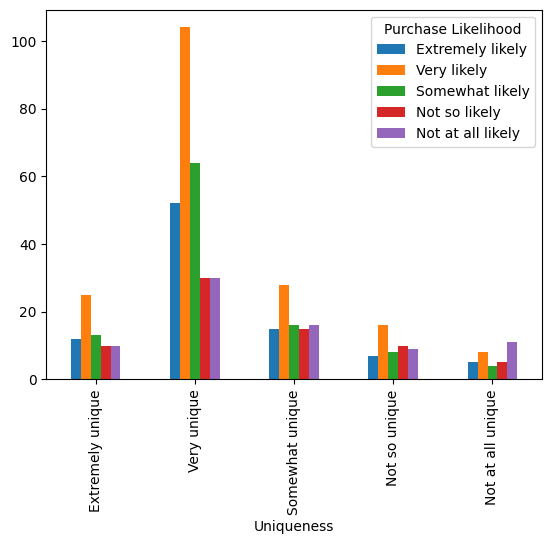

In [ ]:
# Plot clustered bar chart to visualize
df_crosstab.plot.bar(rot=0)
plt.xticks(rotation=90)
plt.show()

# The Fisher's Exact Test
The Fisher's Exact Test is a statistical method employed when analyzing contingency tables, particularly in cases where sample sizes are small or when the assumptions of the chi-square test are not met. This test is particularly robust for 2x2 tables but can be extended to larger tables as well. Unlike the chi-square test, which relies on approximations based on large sample theory, the Fisher's Exact Test calculates the exact probability of observing the given table, making it highly suitable for situations with limited data. By determining the probability of obtaining the observed distribution or more extreme distributions under the assumption of independence, the Fisher's Exact Test offers a precise assessment of the association between categorical variables. This makes it particularly valuable in research areas such as clinical trials, genetics, and rare event studies, where sample sizes may be small, and accurate inference is paramount.

In [25]:
import pandas as pd
from scipy.stats import fisher_exact

# Create a 2x2 contingency table without margins
contingency_table = pd.crosstab(df['lnpos_YN'], df['status'])

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print the result
print(f"Odds ratio: {odds_ratio}")
print(f"P-value: {p_value}")

Odds ratio: 2.5547235023041477
P-value: 0.000260301037684315


# Another Example
Now, explore the association between 'pathsize_Cat' and 'status' by applying the chi-square test. This analysis will generate a 3x2 contingency table, allowing for the examination of potential dependencies or independencies between the different categories within these two variables.

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
category_order = ['<= 2', '2 <  <= 5', '> 5']

# Convert 'pathsize_Cat' to a categorical variable with the specified order
df['pathsize_Cat'] = pd.Categorical(df['pathsize_Cat'], categories=category_order, ordered=True)

# Create the contingency table
contingency_table = pd.crosstab(df['pathsize_Cat'], df['status'])

print("Contingency Table with Frequencies:")
print(contingency_table)
print("#"*60)

# Calculate row percentages
row_percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

print("\nRow Percentages:")
print(row_percentages)
print("#"*60)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("#"*60)

# Calculate the percentage of cells with expected counts less than 5
percentage_low_expected = (expected < 5).sum().sum() / (expected.shape[0] * expected.shape[1]) * 100

print(f"Percentage of cells with expected counts less than 5: {percentage_low_expected:.2f}%")
print("#"*60)

# Calculate residuals (observed minus expected values)
residuals = contingency_table - expected

print("\nResiduals (Observed - Expected):")
print(residuals)
print("#"*60)

Contingency Table with Frequencies:
status          0   1
pathsize_Cat         
<= 2          795  31
2 <  <= 5     250  33
> 5            10   2
############################################################

Row Percentages:
status                0          1
pathsize_Cat                      
<= 2          96.246973   3.753027
2 <  <= 5     88.339223  11.660777
> 5           83.333333  16.666667
############################################################

Chi-squared value: 26.331382485423475
P-value: 1.9151947512693743e-06
Degrees of freedom: 2
############################################################
Percentage of cells with expected counts less than 5: 16.67%
############################################################

Residuals (Observed - Expected):
status                0          1
pathsize_Cat                      
<= 2          17.631579 -17.631579
2 <  <= 5    -16.338091  16.338091
> 5           -1.293488   1.293488
######################################################

Due to expected values in the third row of the contingency table being **less than 5** and the **consistent sign** of residuals in the **"2 < =<5"** and **">5"** categories, indicative of a coherent direction in the relationship between 'pathsize_Cat' and 'status', a decision is made to **merge** these two categories. Consequently, a new variable is introduced to the dataset, simplifying the 'pathsize_Cat' variable into two categories: **"<2" and ">2"**. This consolidation aids in preserving the statistical integrity of the analysis and enhances the interpretability of the relationship between the variables.

In [27]:
# Merge two classes (e.g., merging 'Class2' and 'Class3' into a new class 'MergedClass')
df['pathsize_Cat2'] = df['pathsize_Cat'].replace({'> 5': '> 2', '2 <  <= 5': '> 2'})
df['pathsize_Cat2'].value_counts()

<ipython-input-27-f69fdeff5f44>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['pathsize_Cat2'] = df['pathsize_Cat'].replace({'> 5': '> 2', '2 <  <= 5': '> 2'})


,count
pathsize_Cat2,
<= 2,826
> 2,295


Now, with the merged variable, we can implement the chi-square test to assess the relationship between the new variable and 'status'. This analysis provides insights into the potential association between the simplified 'pathsize_Cat' and the outcome variable.

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['pathsize_Cat2'], df['status'])

print("Contingency Table with Frequencies:")
print(contingency_table)
print("#"*60)

# Calculate row percentages
row_percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

print("\nRow Percentages:")
print(row_percentages)
print("#"*60)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("#"*60)

# Calculate the percentage of cells with expected counts less than 5
percentage_low_expected = (expected < 5).sum().sum() / (expected.shape[0] * expected.shape[1]) * 100

print(f"Percentage of cells with expected counts less than 5: {percentage_low_expected:.2f}%")
print("#"*60)

# Calculate residuals (observed minus expected values)
residuals = contingency_table - expected

print("\nResiduals (Observed - Expected):")
print(residuals)
print("#"*60)

# Calculate odds ratio
OR_CIs(contingency_table)

Contingency Table with Frequencies:
status           0   1
pathsize_Cat2         
<= 2           795  31
> 2            260  35
############################################################

Row Percentages:
status                 0          1
pathsize_Cat2                      
<= 2           96.246973   3.753027
> 2            88.135593  11.864407
############################################################

Chi-squared value: 24.367622791900047
P-value: 7.959525236464673e-07
Degrees of freedom: 1
############################################################
Percentage of cells with expected counts less than 5: 0.00%
############################################################

Residuals (Observed - Expected):
status                 0          1
pathsize_Cat2                      
<= 2           17.631579 -17.631579
> 2           -17.631579  17.631579
############################################################
Odds Ratio: 3.45
95% Confidence Interval: 2.09, 5.71


<ipython-input-24-9cc14cff7b56>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  log_odds_std_error = np.sqrt(contingency_table.applymap(lambda x: 1/x).sum().sum())


# The Chi-Square Independence Test for Reports
The chi-square independence test is applicable to scenarios where data is presented in the form of a contingency table, showcasing frequencies across different categories. This test is particularly useful when analyzing categorical data that doesn't fit the typical two-column format, allowing for the examination of associations and dependencies between variables presented in tabular form.

In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example DataFrame with a contingency table
data = {
    'Status=0': [887, 42],
    'Status=1': [248, 30]
}

df_contingency = pd.DataFrame(data)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(df_contingency)

# Print the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("#"*60)

# Calculate the percentage of cells with expected counts less than 5
percentage_low_expected = (expected < 5).sum().sum() / (expected.shape[0] * expected.shape[1]) * 100

print(f"Percentage of cells with expected counts less than 5: {percentage_low_expected:.2f}%")
print("#"*60)

# Calculate residuals (observed minus expected values)
residuals = df_contingency - expected

print("\nResiduals (Observed - Expected):")
print(residuals)
print("#"*60)

# Calculate odds ratio
OR_CIs(df_contingency)

Chi-squared value: 13.900758213995182
P-value: 0.00019272070767964805
Degrees of freedom: 1
############################################################
Percentage of cells with expected counts less than 5: 0.00%
############################################################

Residuals (Observed - Expected):
    Status=0   Status=1
0  13.416736 -13.416736
1 -13.416736  13.416736
############################################################
Odds Ratio: 2.55
95% Confidence Interval: 1.57, 4.17


<ipython-input-24-9cc14cff7b56>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  log_odds_std_error = np.sqrt(contingency_table.applymap(lambda x: 1/x).sum().sum())
